In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


,TITLE,REGION,DISTANCE,DIST_TYPE,GAIN,HIGHEST,RATING,RATING_COUNT,LATITUDE,LONGITUDE,REPORT_DATE,REPORT_COUNT,URL
0,2773' 353'P,Central Cascades,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,2011-01-18,1,https://www.wta.org/go-hiking/hikes/2773-353p
1,360 Trails,Puget Sound and Islands,NaN,NaN,NaN,NaN,0.0,0,47.389053,-122.683876,NaN,0,https://www.wta.org/go-hiking/hikes/360-trails
2,45 Mile Sheep Drive,Central Cascades,4.9,one-way,NaN,3144.0,4.0,5,48.024502,-120.650212,2008-08-09,4,https://www.wta.org/go-hiking/hikes/45-mile-sh...
3,520 Trail,Puget Sound and Islands,4.9,one-way,164.0,164.0,2.5,2,47.645136,-122.301863,2020-08-14,12,https://www.wta.org/go-hiking/hikes/520-trail
4,76 Creek,North Cascades,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,2020-09-21,7,https://www.wta.org/go-hiking/hikes/76-creek-t...


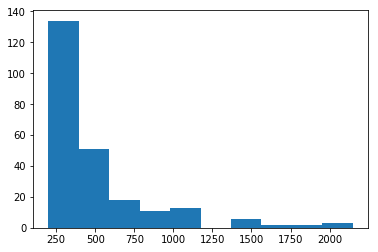

In [4]:
#load data
df = pd.read_csv("2021-03-29_wta_hike_data.csv")
df.sort_values(by="REPORT_COUNT",ascending=False).index[:99]
plt.hist(df["REPORT_COUNT"].loc[df["REPORT_COUNT"]>200])
#top100=df.iloc[df.sort_values(by="REPORT_COUNT",ascending=False).index[:99],:]
df.head()

Number of NaN: 1227
one-way:
    nobs         minmax       mean     variance   skewness    kurtosis
0   252  (0.1, 1200.0)  17.035833  5987.576938  14.320095  215.574959
roundtrip:
    nobs        minmax      mean  variance   skewness    kurtosis
0  2278  (0.1, 300.0)  7.270667  82.70547  15.907942  475.535203
trails:
    nobs       minmax      mean    variance  skewness   kurtosis
0   144  (0.2, 68.4)  6.669514  100.805812  3.849176  17.740866


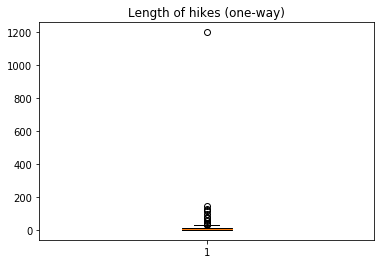

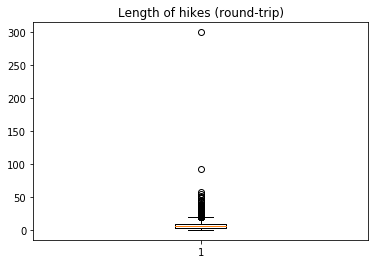

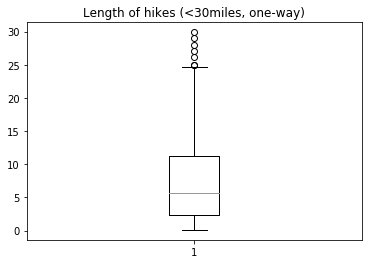

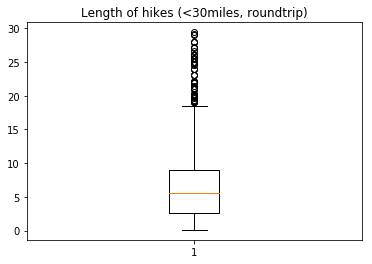

In [5]:
#DISTANCE/TRIP LENGTH (MILES)

print("Number of NaN:", df["DISTANCE"].isna().sum()) #get number of empty entries

oneway = df[df['DIST_TYPE']=="one-way"]
roundtrip = df[df['DIST_TYPE']=="roundtrip"] 
trails = df[df['DIST_TYPE']=="trails"] 

a=stats.describe(oneway["DISTANCE"])
print("one-way:\n",pd.DataFrame([a], columns=a._fields))

a=stats.describe(roundtrip["DISTANCE"])
print("roundtrip:\n",pd.DataFrame([a], columns=a._fields))

a=stats.describe(trails["DISTANCE"])
print("trails:\n",pd.DataFrame([a], columns=a._fields))



#unfiltered
plt.boxplot(oneway["DISTANCE"])
plt.title("Length of hikes (one-way)")
plt.show()

plt.boxplot(roundtrip["DISTANCE"])
plt.title("Length of hikes (round-trip)")
plt.show()

#filtered
plt.boxplot(oneway["DISTANCE"].loc[oneway["DISTANCE"]<30])
plt.title("Length of hikes (<30miles, one-way)")
plt.show()

plt.boxplot(roundtrip["DISTANCE"].loc[roundtrip["DISTANCE"]<30])
plt.title("Length of hikes (<30miles, roundtrip)")
plt.show()



Number of NaN: 1699
   nobs          minmax         mean      variance  skewness   kurtosis
0  2202  (8.0, 27996.0)  1706.512716  3.732141e+06   4.47446  42.165566


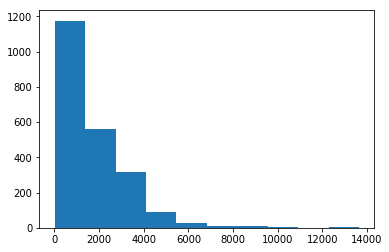

In [21]:
#GAIN (elevation gain?)
print("Number of NaN:", df["GAIN"].isna().sum()) #get number of empty entries
a=stats.describe(df["GAIN"].dropna())
print(pd.DataFrame([a], columns=a._fields))

plt.hist(df["GAIN"].dropna().loc[df["GAIN"]<15000])
plt.show()

Number of NaN: 1613
   nobs          minmax         mean      variance  skewness  kurtosis
0  2288  (5.0, 12276.0)  3850.225962  5.930982e+06  0.011566 -1.025437


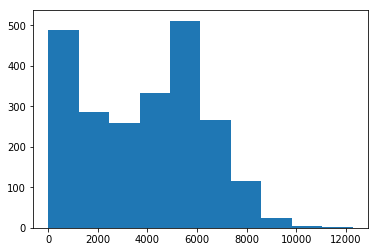

In [27]:
#HIGHEST ELEVATION
print("Number of NaN:", df["HIGHEST"].isna().sum()) #get number of empty entries

a=stats.describe(df["HIGHEST"].dropna())
print(pd.DataFrame([a], columns=a._fields))
plt.hist(df["HIGHEST"].dropna())
plt.show()

Number of ratings
Number of empty fields: 863
   nobs    minmax      mean    variance   skewness    kurtosis
0  3901  (0, 339)  6.700333  288.198126  10.144174  145.246743


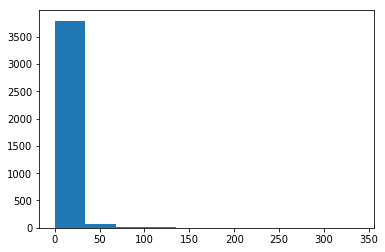

Ratings
   nobs      minmax      mean  variance  skewness  kurtosis
0  3038  (1.0, 5.0)  3.359329  0.694706 -0.292849  0.048935


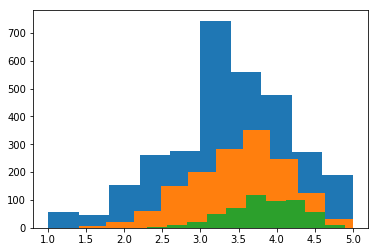

In [57]:
#RATING_COUNT
print("Number of ratings")
print("Number of empty fields:", df[df["RATING_COUNT"]==0]["RATING_COUNT"].count()) #get number of empty entries
a=stats.describe(df["RATING_COUNT"])
print(pd.DataFrame([a], columns=a._fields))


plt.hist(df["RATING_COUNT"])
plt.show()

#RATING
print("Ratings")
#print("Number of empty fields:", df[df["RATING"]==0]["RATING"].count()) #get number of empty entries
ratings_filt = df[df["RATING"]>0]
a=stats.describe(ratings_filt["RATING"])
print(pd.DataFrame([a], columns=a._fields))
plt.hist(ratings_filt["RATING"])
plt.hist(ratings_filt[ratings_filt["RATING_COUNT"]>4]["RATING"])
plt.hist(ratings_filt[ratings_filt["RATING_COUNT"]>9]["RATING"])


plt.show()

